# Simple & Multiple Linear Regression

Regression analysis is a statistical methodology that allows us to determine the strength and relationship between the variables.  
The results from the regression help in predicting an unknown value depending on the relationship with the predicting variables. For example, someone’s height and weight usually have a relationship. Generally, taller people tend to weigh more. We could use regression analysis to help predict the weight of an individual, given their height.

* When there is a single input variable, the regression is referred to as `Simple Linear Regression`. 
   * We use the single variable (independent) to model a linear relationship with the target variable (dependent). 
* When there are more than one predicting variable, the regression is referred to as `Multiple Linear Regression`.

### Regression coefficients
When performing simple linear regression, the four main components are:
1. Dependent ($y$) Variable — Target variable / will be estimated and predicted
2. Independent ($x_i$) Variable — Predictor variable / used to estimate and predict
3. Coefficients ($\beta_i$)— Angle of the line / denoted as m or 
l. 
4. Intercept — Where function crosses the y-axis / denoted as 
$\beta_0$ or $c$

### R-Squared (Coefficient of determination)

The `R- Squared` measure can be used to determine a how well a model fits the data. This measure is also known as the `Coefficient of Determination`.

### Terminologies

* R-Squared - Percent of variance explained by the model.
* Adj. R-Squared - R-Squared where additional independent variables are penalized
* F-statistic - Significance of fit Prob (F-statistic): Probability of seeing F-statistic from a sample
* Log-likelihood: Log of the likelihood function
* AIC: Akaike Information Criterion, penalizes model when more independent variables are added.
* BIC: Bayesian Information Criterion, similar to AIC but with higher penalties
* coef: Estimated coefficient value 
* std err: Standard error of the coefficient estimate
* t: Measure of statistical significance for coefficient
* P>|t|: Probability value that the coefficient is equal to 0
* [0.xxxx 0.xxxx]: Lower and upper halves of 95% confidence interval

* Omnibus: Omnibus D’Angostino’s test, statistical test for skewness and kurtosis
* Prob(Omnibus): Omnibus statistic as a probability
* Skew: Measure of data mean symmetry
* Kurtosis: Measure of shape of the distribution
* Durbin-Watson: Test for autocorrelation
* Jarque-Bera (JB): Test for skewness & kurtosis
* Prob (JB): Jarque-Bera statistic as a probability
* Cond. No.: Test for multicollinearity


### Assumptions of Linear Regression

Regression, being a parametric technique, relies on parameters learned from the data. This also means that the data must fulfill certain assumptions. 
* These assumptions are necessary, but not sufficient, for obtaining reliable results. 
* If the assumptions aren’t fulfilled, our predictions may be, but not necesarily, biased.

1. Linearity: 
  There is a linear relationship between the dependent variable (y) and the independent variable (x). 
  * We can check for linearity by creating a scatter plot.

2. Normality: 
  This assumption states that the `residuals` (`actual_y - predicted_y` ) of a model are normally distributed. 
  * This assumption can be checked by created `histograms` or `quantile-quantile (Q-Q)-Plots` (are scatterplots of two sets of quantiles plotted against each other).
  * Another method of checking the normality assumption is the [Jarque- Bera (JB) test](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html#:~:text=The%20Jarque%2DBera%20test%20statistic%20tests%20the%20null%20that%20the,asymptotic%20χ22%20distribution.).

3. Little or No multi-colinearity :
  Multicollinearity describes the correlation between the predictor variables. This assumption states that the predictor variables are independent. 
* We can check this assumption by creating pair plots and/or heat maps. 
* Another method would be to calculate the Variance Inflation Factor (VIF) (In general, a VIF value of 5 is too high).
  - What would it mean if we did have features showing multicollinearity? For example, let’s say that the
`height` and `salary` features show multicollinearity. This would make it difficult for us to separate the effects of just `height` on `health` .

4. Homoscedasticity : It refers to the variability of the dependent variable being equal across the independent variable values. 
* We can check this assumption by creating a scatterplot of the model predictions and residuals, we’re looking for the residuals to equal across the regression line. 
* We could also use a significance test such as the Breusch- Pagan test.
  * The Breusch-Pagan test returning a p- value this low tells us we can reject the null hypothesis (homoscedasticity), and therefore, we’re violating the Homoscedasticity assumption.

5. Little or No autocorrelation in the residuals: 
Autocorrelation refers to the model residuals are dependent. 
* If there were to be a correlation in the error terms, our model’s accuracy would decrease. 
* This assumption can be checked using the Durbin-Watson test or creating an error plot. 
  - For the Durbin-Watson (DB) test, we’re looking for a value between 1.5–2.5 A few things to know regarding the DB test:
    - 2.00: No Autocorrelation
    - 0.00 - 1.90: Positive Autocorrelation 
    - 2.10 – 4.00: Negative Autocorrelation



### Ordinary Least Squares

When we’re using the smallest sum of squared errors,  to find the “best fit line”, the regression model can sometimes be referred to as `Ordinary Least Squares Regression`.

  * The `error` is the difference between the `predicted y value` subtracted from the `actual y value`. 
  * The difference is squared so there is an absolute difference, and summed.
  * `error = y_actual - y_predicted`

### Bear in mind

* We’re actually working with estimations.
* Our goal here is to find the line that best describes the data. 
* When working with estimations, we can make use of the “hat” notation ( ^ ).



Here we see how to perform simple and multiple linear regression with two different Python packages. The two packages have different properties:

- `statsmodels` has a better coverage of statistics methods and knowledge
   * Because linear regression is used more by statisticians than computer scientists, `statsmodels` is more suitable to perform and understand regression.

- `scikit-learn` has a better coverage of machine learning algorithms

   * For cross-validation, `scikit-learn` has better built-in support for it. 


In [1]:
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/reg_data.csv'
df = pd.read_csv(path)
df

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,Chicago,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,Chicago,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,New York,90.0,BMW,Master,2000
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master,2010
5,Female,1700.0,42.0,Washington,60.0,Ford,Master,2000
6,Male,3000.0,50.0,Washington,77.0,Ford,HighSchool,2010
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor,2010
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor,2004
9,Male,2900.0,46.0,New York,70.0,GM,Master,2008


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

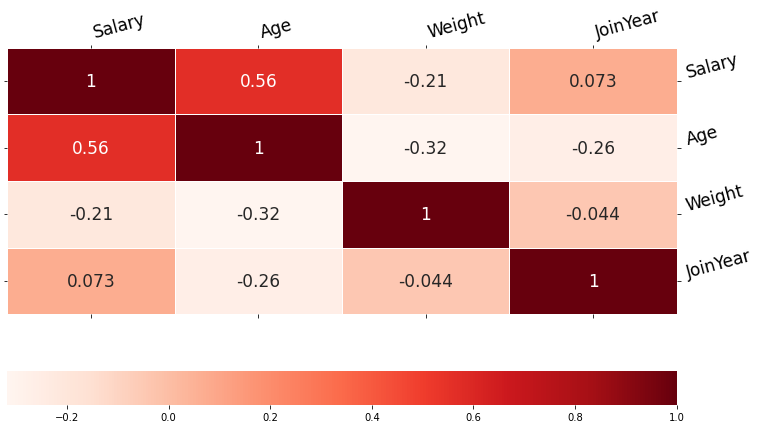

In [4]:

hm = plt.subplots(figsize=(12, 7))
hm = sns.heatmap(df.corr(), 
           annot = True, 
           linewidth=0.5,
            cmap = 'Reds', 
            annot_kws={"size": 17}, 
                 cbar_kws={"orientation": "horizontal"},
           )

hm.set_yticklabels(hm.get_ymajorticklabels(), 
                   fontsize = 17, 
                  )
hm.set_yticklabels(hm.get_ymajorticklabels(), 
                   fontsize = 17, 
                   rotation = 15
                  )
hm.tick_params(#axis='y', 
               right=True,  # a line will appear if it is true 
               labelleft=False, 
               labelright=True, 
              )
#to place the top lables in 'left' position
ylables = hm.get_yticklabels()#which='both')
for i in ylables:
    i.set_va('bottom')

hm.set_xticklabels(hm.get_xmajorticklabels(), 
                   fontsize = 17, 
                   rotation = 15
                  )
hm.tick_params(#axis='x', 
               top=True,  # a line will appear if it is true 
               labeltop=True, 
               labelbottom=False, 
              )

#to place the top lables in 'left' position
ticklbls = hm.get_xticklabels()#which='both')
for x in ticklbls:
    x.set_ha('left')

# Simple regression (Only one regressor)

###  Salary = b0 + b1*Age

Input contains NaN,leads to error. 

In [5]:
#y = pd.DataFrame(df['Salary'])
#X = pd.DataFrame(df['Age'])
#lm = linear_model.LinearRegression()
#model_lm = lm.fit(X, y)
#model_lm

In [6]:
df.Age.isnull().any()

True

In [7]:
#df.dropna(inplace = True)

In [8]:
favs = ['Salary','Age' ]

In [9]:
df.dropna(subset = favs, 
          inplace = True
          )
df

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,Chicago,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,Chicago,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,New York,90.0,BMW,Master,2000
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master,2010
5,Female,1700.0,42.0,Washington,60.0,Ford,Master,2000
6,Male,3000.0,50.0,Washington,77.0,Ford,HighSchool,2010
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor,2010
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor,2004
9,Male,2900.0,46.0,New York,70.0,GM,Master,2008


In [10]:
df.Weight.isna().all()

False

###  Salary = b0 + b1*Age

In [11]:
X = pd.DataFrame(df['Age'])
y = pd.DataFrame(df['Salary'])

lm = linear_model.LinearRegression()

model_lm = lm.fit(X, y)
model_lm

LinearRegression()

In [12]:
print('The intercept is \t :\t',         model_lm.intercept_)
print('The coefficients are \t : \t',    model_lm.coef_)
print('Model score (R-squared) is : \t', model_lm.score(X, y))

The intercept is 	 :	 [606.34509569]
The coefficients are 	 : 	 [[41.96351675]]
Model score (R-squared) is : 	 0.31711161647425


Alternative option is: 
* OLS.from_formula

In [13]:
modelA  = sm.OLS.from_formula("Salary ~ Age", 
                              data=df
                             ) 
resultA = modelA.fit()
resultA.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.966
Date:                Tue, 28 Feb 2023   Prob (F-statistic):             0.0186
Time:                        23:05:33   Log-Likelihood:                -128.66
No. Observations:                  17   AIC:                             261.3
Df Residuals:                      15   BIC:                             263.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    606.3451    674.058      0.900      0.383    -830.376    2043.066
Age           41.9635     15.900      2.639      0.019       8.074      75.853
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.315
Skew:                           0.084   Prob(JB):                        0.854
Kurtosis:                       2.354   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Kurtosis measures extreme values in either tail
* Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. 
* Kurtosis identifies whether the tails of a given distribution contain extreme values.

* `kurtosistest` test whether a dataset has normal kurtosis  : This function tests the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.

## Conclusion:

#### Salary = 349.4458 + 48.0932*Age

In [14]:
predict_values = resultA.fittedvalues.to_frame()
RESI_A = resultA.resid

study = [ df['Salary'], 
         df['Age'], 
         predict_values, 
         RESI_A 
         ]

study  #is a list 

[0     1300.0
 1     1250.0
 2     2200.0
 3     2100.0
 4     1500.0
 5     1700.0
 6     3000.0
 7     3000.0
 8     2800.0
 9     2900.0
 10    2780.0
 11    2550.0
 14    2780.0
 15    2550.0
 16    2550.0
 17    2550.0
 18    2550.0
 Name: Salary, dtype: float64, 0     35.0
 1     33.0
 2     34.0
 3     42.0
 4     29.0
 5     42.0
 6     50.0
 7     55.0
 8     31.0
 9     46.0
 10    36.0
 11    48.0
 14    36.0
 15    48.0
 16    48.0
 17    48.0
 18    48.0
 Name: Age, dtype: float64,               0
 0   2075.068182
 1   1991.141148
 2   2033.104665
 3   2368.812799
 4   1823.287081
 5   2368.812799
 6   2704.520933
 7   2914.338517
 8   1907.214115
 9   2536.666866
 10  2117.031699
 11  2620.593900
 14  2117.031699
 15  2620.593900
 16  2620.593900
 17  2620.593900
 18  2620.593900, 0    -775.068182
 1    -741.141148
 2     166.895335
 3    -268.812799
 4    -323.287081
 5    -668.812799
 6     295.479067
 7      85.661483
 8     892.785885
 9     363.333134
 10    662.9683

In [15]:
study_table = pd.concat(study, 
                        axis=1
                       )
study_table

,Salary,Age,0,0
0,1300.0,35.0,2075.068182,-775.068182
1,1250.0,33.0,1991.141148,-741.141148
2,2200.0,34.0,2033.104665,166.895335
3,2100.0,42.0,2368.812799,-268.812799
4,1500.0,29.0,1823.287081,-323.287081
5,1700.0,42.0,2368.812799,-668.812799
6,3000.0,50.0,2704.520933,295.479067
7,3000.0,55.0,2914.338517,85.661483
8,2800.0,31.0,1907.214115,892.785885
9,2900.0,46.0,2536.666866,363.333134


In [16]:
study_table.columns =['Salary', 
                      'Age',  
                      'PredictValues', 
                      'RESI_Age'
                      ] #renaming the columns 

study_table['difference'] = study_table['Salary'] - study_table['PredictValues']

study_table

,Salary,Age,PredictValues,RESI_Age,difference
0,1300.0,35.0,2075.068182,-775.068182,-775.068182
1,1250.0,33.0,1991.141148,-741.141148,-741.141148
2,2200.0,34.0,2033.104665,166.895335,166.895335
3,2100.0,42.0,2368.812799,-268.812799,-268.812799
4,1500.0,29.0,1823.287081,-323.287081,-323.287081
5,1700.0,42.0,2368.812799,-668.812799,-668.812799
6,3000.0,50.0,2704.520933,295.479067,295.479067
7,3000.0,55.0,2914.338517,85.661483,85.661483
8,2800.0,31.0,1907.214115,892.785885,892.785885
9,2900.0,46.0,2536.666866,363.333134,363.333134


### Case study
Df Model: 1 ( so we need at least 1 data to find the salary)

**Case1**

In [17]:
age = float(input('Age of the person is'))

Age of the person is36


In [18]:
age

36.0

In [19]:
print('A person with Age {} has a salary of \t'.format(age, 349.4458 + 48.0932*age))
study_table.iloc[:1,:]

A person with Age 36.0 has a salary of 	


,Salary,Age,PredictValues,RESI_Age,difference
0,1300.0,35.0,2075.068182,-775.068182,-775.068182


Alternative option is:

OLS

In [20]:
X = df["Age"]
y = df["Salary"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model; if it is not there, we are forcing to pass intercpet through 0. 

modelAS  = sm.OLS(y, X)
resultAS = modelAS.fit()
resultAS.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.966
Date:                Tue, 28 Feb 2023   Prob (F-statistic):             0.0186
Time:                        23:05:48   Log-Likelihood:                -128.66
No. Observations:                  17   AIC:                             261.3
Df Residuals:                      15   BIC:                             263.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.3451    674.058      0.900      0.383    -830.376    2043.066
Age           41.9635     15.900      2.639      0.019       8.074      75.853
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.315
Skew:                           0.084   Prob(JB):                        0.854
Kurtosis:                       2.354   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:

Salary = 349.4458 + 48.0932*Age


### Using linear model to predict particular values

In [21]:
lm = linear_model.LinearRegression()

X = pd.DataFrame(df['Age'])
y = pd.DataFrame(df['Salary'])

model_lm = lm.fit(X, y)   # Salary = b0 + b1*Age
model_lm

LinearRegression()

In [22]:
#z = [0, 15, 33, 34, 35]
z = [float(x) for x in input("Please enter the `Age`s (comma in between) to find `Salary`: ").split(',')]
z

Please enter the `Age`s (comma in between) to find `Salary`: 24, 30, 40


[24.0, 30.0, 40.0]

In [23]:
a = pd.DataFrame(z)

b = model_lm.predict(a)
b = pd.DataFrame(b)
b

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,0
0,1613.469498
1,1865.250598
2,2284.885766


In [24]:
df_new = pd.concat([a,b], 
                   axis=1
                  )
df_new.columns = ['new_Age', 'predict_Salary']
df_new

,new_Age,predict_Salary
0,24.0,1613.469498
1,30.0,1865.250598
2,40.0,2284.885766


### Observations: 
1. When `new_Age` = 0, `predict_Salary` = `intercept`= 623.578932
2. When `new_Age` = 33, `predict_Salary` = `Salary` (fron equation)= 2052.641965
3. When `Age` = 33, `Salary` = 1500; Thus RESI = 1500 - 2052.641965 =  -552.641965
4. When `Age` = 33, `Salary` = 1200; Thus RESI = 1200 - 2052.641965 =  -852.641965

In [25]:
RESI_A = resultA.resid
#RESI

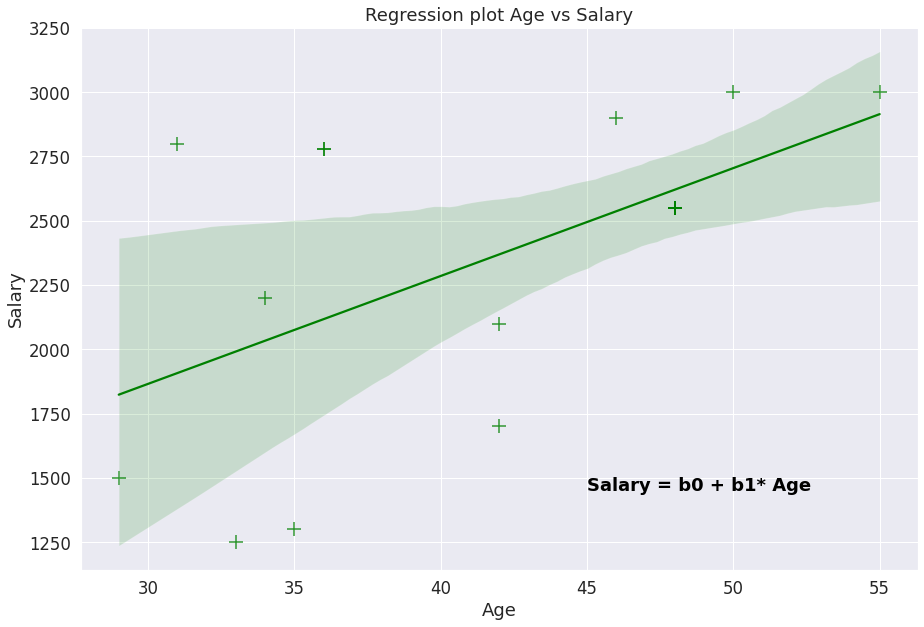

In [26]:
plt.figure(figsize=(15, 10)) 

sns.set(font_scale=1.5)

ax = sns.regplot(x='Age',     # Salary = b0 + b1*Age
                 y='Salary', 
                 data=df, 
                 color='green', 
                 marker='+', 
                 scatter_kws={'s': 200}
                )

ax.set(xlabel='Age', 
       ylabel='Salary'
      )

ax.text(45, 1450, 'Salary = b0 + b1* Age',  horizontalalignment='left', size='medium', color='black', weight='semibold')
ax.set_title('Regression plot Age vs Salary')
plt.show()

In [27]:
RESI_A.describe()

count    1.700000e+01
mean     6.687461e-14
std      4.828079e+02
min     -7.750682e+02
25%     -2.688128e+02
50%     -7.059390e+01
75%      2.954791e+02
max      8.927859e+02
dtype: float64

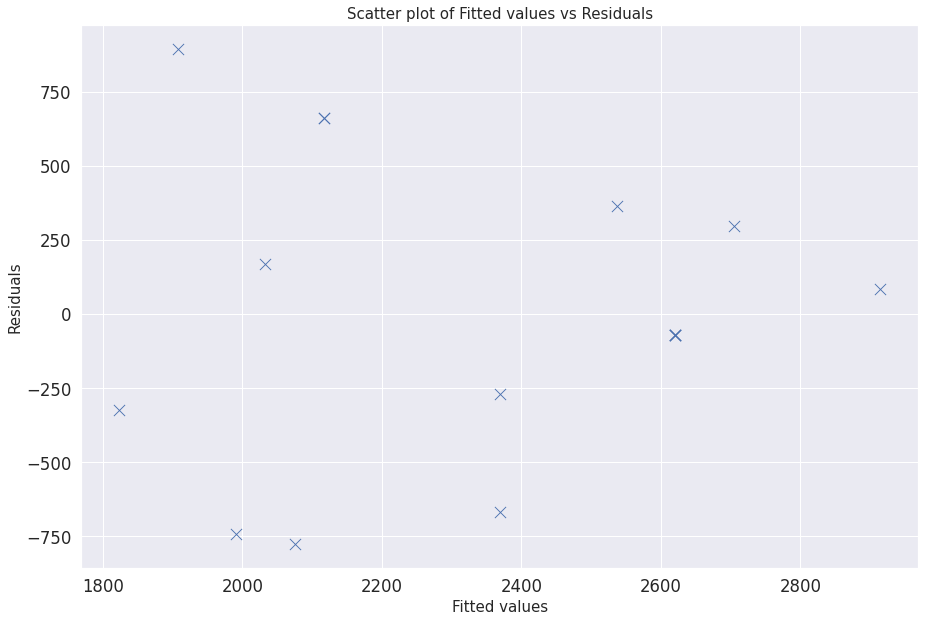

In [28]:
plt.figure(figsize=(15, 10))

pp = sns.scatterplot(x = resultA.fittedvalues, 
                     y = RESI_A,
                     marker='x',
                     s=125,#size of markers
                     #facecolor = 'b'
                    )



pp.set_xlabel("Fitted values", size = 15)
pp.set_ylabel("Residuals", size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuals", size = 15)
plt.show()

# Multiple regression with categorical variable

* Salary = b0 + b1*Age + b2*Gender
* Salary = b0 + b1*Age + b2*(Male + Female)


b2 the slope is the difference to the OTHER GENDER. 

### 2.1. OLS.from_formula

In [29]:
modelAG = sm.OLS.from_formula("Salary ~ Age + Gender", 
                              data=df
                              ) # Salary = b0 + b1*Age + b2*Gender
resultAG = modelAG.fit()
resultAG.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     3.108
Date:                Tue, 28 Feb 2023   Prob (F-statistic):             0.0789
Time:                        23:06:10   Log-Likelihood:                -121.44
No. Observations:                  16   AIC:                             248.9
Df Residuals:                      13   BIC:                             251.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        874.7433    968.174      0.903      0.383   -1216.869    2966.355
Gender[T.Male]   188.7701    423.620      0.446      0.663    -726.406    1103.946
Age               33.0033     27.396      1.205      0.250     -26.183      92.189
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.623
Skew:                           0.295   Prob(JB):                        0.732
Kurtosis:                       2.234   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:

* Salary  = b0 + b1* Age + b2* Gender

* Salary  = 749.8157 + 34.2211* Age + 306.7169* Male

`Males` have $ 306.7169 more salary than of `Females` of same category 

In [30]:
RESI_AG    = resultAG.resid
prValuesAG = resultAG.fittedvalues.to_frame()

study = [df['Salary'], df['Age'], df['Gender'], prValuesAG, RESI_AG]

study_table = pd.concat(study, axis=1)

study_table.columns =['Salary', 'Age', 'Gender', 'PreValues', 'RESI_AG']

study_table['difference'] = study_table['Salary'] - study_table['PreValues']

study_table

,Salary,Age,Gender,PreValues,RESI_AG,difference
0,1300.0,35.0,Female,2029.858554,-729.858554,-729.858554
1,1250.0,33.0,Female,1963.851968,-713.851968,-713.851968
2,2200.0,34.0,Male,2185.625317,14.374683,14.374683
3,2100.0,42.0,Male,2449.651664,-349.651664,-349.651664
4,1500.0,29.0,Female,1831.838794,-331.838794,-331.838794
5,1700.0,42.0,Female,2260.881608,-560.881608,-560.881608
6,3000.0,50.0,Male,2713.678010,286.321990,286.321990
7,3000.0,55.0,Male,2878.694477,121.305523,121.305523
8,2800.0,31.0,Female,1897.845381,902.154619,902.154619
9,2900.0,46.0,Male,2581.664837,318.335163,318.335163


### Case study:

Df Model: 2. So we need 2 information to find the salary of a person. 



**Salary = 749.8157 + 34.2211* Age + 306.7169* Male**

In [31]:
age = int(input('Enter age of the person:\t'))
gen = int(input('Is it a Male (enter 1 if yes, 0 otherwise:)\t'))

Enter age of the person:	33
Is it a Male (enter 1 if yes, 0 otherwise:)	1


In [32]:
if gen ==1:
  gender = 1
  genero = 'Male'
else:
  gender = 0
  genero = 'Female'
print('Age is {}, \nGender is {}'.format(age, genero))

Age is 33, 
Gender is Male


In [33]:
print('salary of a {} of age {} is = {}'.format(genero, age, 749.8157 + 34.2211* age + 306.7169* gender))
#study_table.iloc[2:3,]

salary of a Male of age 33 is = 2185.8289


**case2:** Age = 34; Male = False

In [34]:
print('salary of a Female of age 33 is =', 749.8157 + 34.2211* 33 + 306.7169* 0)
#same as we see in the above table
study_table.iloc[1:2,]

salary of a Female of age 33 is = 1879.112


,Salary,Age,Gender,PreValues,RESI_AG,difference
1,1250.0,33.0,Female,1963.851968,-713.851968,-713.851968


# Multiple regression with TWO categorical variable

* Salary = b0 + b1 * Age + b2 * Gender + b3 * Education
* Salary = b0 + b1 * Age + b2 * (Male + Female) + b3 * (Master+Bachelor+HighSchool)
* Salary = b0 + b1 * Age + b2 * Male + b3 * Master + b4 * No

In [35]:
favs = ['Salary', 'Age', 'Gender', 'Education']
ndf =  df.dropna(subset = favs, 
          )
ndf

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,Chicago,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,Chicago,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,New York,90.0,BMW,Master,2000
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master,2010
5,Female,1700.0,42.0,Washington,60.0,Ford,Master,2000
6,Male,3000.0,50.0,Washington,77.0,Ford,HighSchool,2010
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor,2010
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor,2004
9,Male,2900.0,46.0,New York,70.0,GM,Master,2008


In [36]:
ndf.isnull().all()

Gender       False
Salary       False
Age          False
Place        False
Weight       False
Company      False
Education    False
JoinYear     False
dtype: bool

In [37]:
modelAGA= sm.OLS.from_formula("Salary ~ Age + Gender + Education", data=ndf) # Salary = b0 + b1*Age + b2*Gender +  b3 * Education
resultAGA = modelAGA.fit()
resultAGA.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     1.878
Date:                Tue, 28 Feb 2023   Prob (F-statistic):              0.191
Time:                        23:06:18   Log-Likelihood:                -113.00
No. Observations:                  15   AIC:                             236.0
Df Residuals:                      10   BIC:                             239.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 895.1281   1013.504      0.883      0.398   -1363.100    3153.357
Gender[T.Male]            377.0401    471.530      0.800      0.443    -673.593    1427.674
Education[T.HighSchool]   221.7600    409.165      0.542      0.600    -689.917    1133.437
Education[T.Master]      -286.8097    358.267     -0.801      0.442   -1085.079     511.460
Age                        32.0349     29.413      1.089      0.302     -33.500      97.570
==============================================================================
Omnibus:                        0.443   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.009
Skew:                          -0.059   Prob(JB):                        0.995
Kurtosis:                       2.966   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:

* Salary = b0 + b1 * Age + b2 * Gender + b3 * Education
* Salary = b0 + b1 * Age + b2 * (Male + Female) + b3 * (Master+Bachelor+ HighSchool)
* Salary = b0 + b1 * Age + b2 * Male + b3 * Master + b4 * No
* Salary = 815.5485 + 36.3765 * Age + 336.1028 * Male -373.1962 * Master -43.8495 * No

In [38]:
RESI_AGA    = resultAGA.resid
prValuesAGA = resultAGA.fittedvalues.to_frame()

study = [df['Salary'], df['Age'], df['Gender'], df['Education'], prValuesAGA, RESI_AGA]

study_table = pd.concat(study, axis=1)

study_table.columns =['Salary', 'Age', 'Gender', 'Education', 'PreValues', 'RESI_AGA']

study_table['difference'] = study_table['Salary'] - study_table['PreValues']

study_table

,Salary,Age,Gender,Education,PreValues,RESI_AGA,difference
0,1300.0,35.0,Female,Bachelor,2016.349139,-716.349139,-716.349139
1,1250.0,33.0,Female,HighSchool,2174.039382,-924.039382,-924.039382
2,2200.0,34.0,Male,Bachelor,2361.354322,-161.354322,-161.354322
3,2100.0,42.0,Male,Master,2330.823737,-230.823737,-230.823737
4,1500.0,29.0,Female,Master,1537.330136,-37.330136,-37.330136
5,1700.0,42.0,Female,Master,1953.783666,-253.783666,-253.783666
6,3000.0,50.0,Male,HighSchool,3095.672531,-95.672531,-95.672531
7,3000.0,55.0,Male,Bachelor,3034.086948,-34.086948,-34.086948
8,2800.0,31.0,Female,Bachelor,1888.209591,911.790409,911.790409
9,2900.0,46.0,Male,Master,2458.963285,441.036715,441.036715


## Case study:

Df Model: 4

**Case1** Age = 42, Male = True, Master = True, No = False

In [39]:
print('salary of a `Male` of `Age` 42, with `Education` Master is =', 815.5485 + 36.3765 * 42 + 336.1028 * 1 -373.1962 * 1 -43.8495 * 0)
study_table.iloc[3:4,]

salary of a `Male` of `Age` 42, with `Education` Master is = 2306.2681000000002


,Salary,Age,Gender,Education,PreValues,RESI_AGA,difference
3,2100.0,42.0,Male,Master,2330.823737,-230.823737,-230.823737


**Case2** Age = 42, Male = False, Master = True, No = False

In [40]:
print('salary of a `Female` of `Age` 42, with `Education` Master is =', 815.5485 + 36.3765 * 42 + 336.1028 * 0 -373.1962 * 1 -43.8495 * 0)
study_table.iloc[5:6,]

salary of a `Female` of `Age` 42, with `Education` Master is = 1970.1653000000001


,Salary,Age,Gender,Education,PreValues,RESI_AGA,difference
5,1700.0,42.0,Female,Master,1953.783666,-253.783666,-253.783666


**Case3** Age = 33, Male = False, Master = False, No = False

In [41]:
print('salary of a `Female` of `Age` 33, with `Education` Bachelor is =', 815.5485 + 36.3765 * 33 + 336.1028 * 0 -373.1962 * 0 -43.8495 * 0)
study_table.iloc[:1,]

salary of a `Female` of `Age` 33, with `Education` Bachelor is = 2015.973


,Salary,Age,Gender,Education,PreValues,RESI_AGA,difference
0,1300.0,35.0,Female,Bachelor,2016.349139,-716.349139,-716.349139


## Salary = b0 + b1*JoinYear

In [42]:
favs = ['Salary', 'JoinYear']
df[favs].isnull().all()

Salary      False
JoinYear    False
dtype: bool

In [43]:
adf = df[favs]
adf

,Salary,JoinYear
0,1300.0,2008
1,1250.0,2010
2,2200.0,2004
3,2100.0,2000
4,1500.0,2010
5,1700.0,2000
6,3000.0,2010
7,3000.0,2010
8,2800.0,2004
9,2900.0,2008


In [44]:
bdf = df[favs].dropna()
bdf

,Salary,JoinYear
0,1300.0,2008
1,1250.0,2010
2,2200.0,2004
3,2100.0,2000
4,1500.0,2010
5,1700.0,2000
6,3000.0,2010
7,3000.0,2010
8,2800.0,2004
9,2900.0,2008


In [45]:
bdf.isna().any()

Salary      False
JoinYear    False
dtype: bool

In [46]:
modelYear= sm.OLS.from_formula("Salary ~ JoinYear", data=bdf) # Salary = b0 + b1*Age + b2*Gender +  b3 * Education
resultYear = modelYear.fit()
resultYear.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                  0.006691
Date:                Tue, 28 Feb 2023   Prob (F-statistic):              0.936
Time:                        23:06:18   Log-Likelihood:                -131.90
No. Observations:                  17   AIC:                             267.8
Df Residuals:                      15   BIC:                             269.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3397.3042   7.03e+04     -0.048      0.962   -1.53e+05    1.47e+05
JoinYear       2.8688     35.072      0.082      0.936     -71.885      77.622
==============================================================================
Omnibus:                        2.954   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.329
Skew:                          -0.844   Prob(JB):                        0.312
Kurtosis:                       2.336   Cond. No.                     9.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
bdf.dtypes

Salary      float64
JoinYear      int64
dtype: object

In [48]:
bdf['JoinYear'] = bdf['JoinYear'].astype(str)
bdf.dtypes

Salary      float64
JoinYear     object
dtype: object

In [49]:
modelYear= sm.OLS.from_formula("Salary ~ JoinYear", data=bdf) # Salary = b0 + b1*Age + b2*Gender +  b3 * Education
resultYear = modelYear.fit()
resultYear.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.227
Method:                 Least Squares   F-statistic:                    0.2588
Date:                Tue, 28 Feb 2023   Prob (F-statistic):              0.899
Time:                        23:06:18   Log-Likelihood:                -131.20
No. Observations:                  17   AIC:                             272.4
Df Residuals:                      12   BIC:                             276.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2290.0000    289.478      7.911      0.000    1659.283    2920.717
JoinYear[T.2004]   226.6667    472.715      0.479      0.640    -803.291    1256.624
JoinYear[T.2008]  -190.0000    541.563     -0.351      0.732   -1369.964     989.964
JoinYear[T.2009]   375.0000    541.563      0.692      0.502    -804.964    1554.964
JoinYear[T.2010]    16.0000    409.383      0.039      0.969    -875.969     907.969
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                1.003
Skew:                          -0.400   Prob(JB):                        0.606
Kurtosis:                       2.120   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
cdf = df[favs]
cdf = cdf.dropna()
cdf.isnull().any()

Salary      False
JoinYear    False
dtype: bool

In [51]:
cdf['JoinYear'] = cdf['JoinYear'].astype('category')
cdf.dtypes

Salary       float64
JoinYear    category
dtype: object

In [52]:
modelYear= sm.OLS.from_formula("Salary ~ JoinYear", data=cdf) # Salary = b0 + b1*Age + b2*Gender +  b3 * Education
resultYear = modelYear.fit()
resultYear.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.227
Method:                 Least Squares   F-statistic:                    0.2588
Date:                Tue, 28 Feb 2023   Prob (F-statistic):              0.899
Time:                        23:06:18   Log-Likelihood:                -131.20
No. Observations:                  17   AIC:                             272.4
Df Residuals:                      12   BIC:                             276.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2290.0000    289.478      7.911      0.000    1659.283    2920.717
JoinYear[T.2004]   226.6667    472.715      0.479      0.640    -803.291    1256.624
JoinYear[T.2008]  -190.0000    541.563     -0.351      0.732   -1369.964     989.964
JoinYear[T.2009]   375.0000    541.563      0.692      0.502    -804.964    1554.964
JoinYear[T.2010]    16.0000    409.383      0.039      0.969    -875.969     907.969
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                1.003
Skew:                          -0.400   Prob(JB):                        0.606
Kurtosis:                       2.120   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, Df Model:	4. 
So we need at least 4 information we need to predict the salary. 

**Salary = 2290.0000	+ 226.6667 JoinYear[T.2004]	- 190.0000 JoinYear[T.2008]		+ 375.0000 JoinYear[T.2009]		+ 115.0000 JoinYear[T.2010]**

In [53]:
years = df.JoinYear.unique()
years

array([2008, 2010, 2004, 2000, 2009])

In [54]:
x = 0
counter = 0
while x<1:
  x = int(input(f'Do you want to know the salary of a person joined in the year {years[counter]} Enter 1 if yes, 0 otherwise: \t'))
  actual_year = years[counter]
  counter = counter+1

Do you want to know the salary of a person joined in the year 2008 Enter 1 if yes, 0 otherwise: 	0
Do you want to know the salary of a person joined in the year 2010 Enter 1 if yes, 0 otherwise: 	0
Do you want to know the salary of a person joined in the year 2004 Enter 1 if yes, 0 otherwise: 	0
Do you want to know the salary of a person joined in the year 2000 Enter 1 if yes, 0 otherwise: 	1


In [55]:
#Salary = 2290.0000	+ 226.6667 JoinYear[T.2004]	- 190.0000 JoinYear[T.2008]		+ 375.0000 JoinYear[T.2009]		+ 115.0000 JoinYear[T.2010]
Salary = 2290.0000	+ 226.6667*0	- 190.0000*0		+ 375.0000*1		+ 115.0000*0

In [56]:
print('Salar of a person in the year {} is {}'.format(actual_year, Salary ))

Salar of a person in the year 2000 is 2665.0


<!--NAVIGATION-->
< [previous](prev) | [Contents](toc.ipynb) | [next](next.ipynb) >